<a href="https://colab.research.google.com/github/mohammadRahimi1993/Exercise/blob/main/LinkPrdicition_ExtractRule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx
!pip install pandas

In [24]:
import networkx as nx
import pandas as pd

# ایجاد یک گراف جهت‌دار
G = nx.DiGraph()

# افزودن گره به گراف جهت‌دار
G.add_nodes_from(['C',
                  'D',
                  'B',
                  'A',
                  'C',
                  'E'
                  ])

# تعریف کردن لبه‌ها
edges = [
    ('A', 'B' , {'relation': 'Ostad'}),
    ('A', 'E', {'relation': 'Hamkar'}),
    ('B', 'C', {'relation': 'Motarjem'}),
    ('E', 'D', {'relation': 'Motarjem'}),
    # ('A', 'C', {'relation': 'Motarjem'}),
    # ('A', 'D', {'relation': 'Motarjem'})
]

G.add_edges_from(edges)

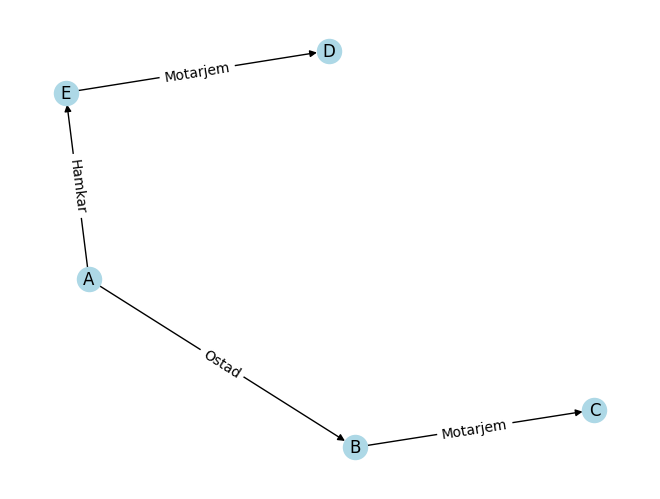

In [29]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=300)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

In [37]:
# ایجاد یک دیتافریم از لبه‌ها
df_edges = pd.DataFrame([(u, v, d['relation']) for u, v, d in G.edges(data=True)], columns=['from', 'to', 'relation'])

print("لبه‌های گراف دانش:")
print(df_edges)

لبه‌های گراف دانش:
  from to  relation
0    B  C  Motarjem
1    A  B     Ostad
2    A  E    Hamkar
3    E  D  Motarjem


In [38]:
# لیست برای ذخیره قوانین استخراج شده
rules = []

# پیمایش تمامی گره‌ها
for node in G.nodes():
    # پیدا کردن همسایگان خروجی (روابطی که از گره خارج می‌شوند)
    neighbors = G.successors(node)
    for neighbor in neighbors:
        # پیدا کردن همسایگان خروجی همسایه
        neighbors_of_neighbor = G.successors(neighbor)
        for second_neighbor in neighbors_of_neighbor:
            # جلوگیری از حلقه‌ها
            if node != second_neighbor:
                # استخراج روابط
                relation1 = G[node][neighbor]['relation']
                relation2 = G[neighbor][second_neighbor]['relation']
                # ذخیره قانون به صورت یک سه‌تایی
                rules.append({
                    'if': f'{node} --{relation1}--> {neighbor} --{relation2}--> {second_neighbor}',
                    'then': f'{node} --?--> {second_neighbor}'
                })

# نمایش قوانین استخراج شده
print("\nقوانین استخراج شده:")
for rule in rules:
    print(f"اگر {rule['if']}، سپس {rule['then']}")


قوانین استخراج شده:
اگر A --Ostad--> B --Motarjem--> C، سپس A --?--> C
اگر A --Hamkar--> E --Motarjem--> D، سپس A --?--> D


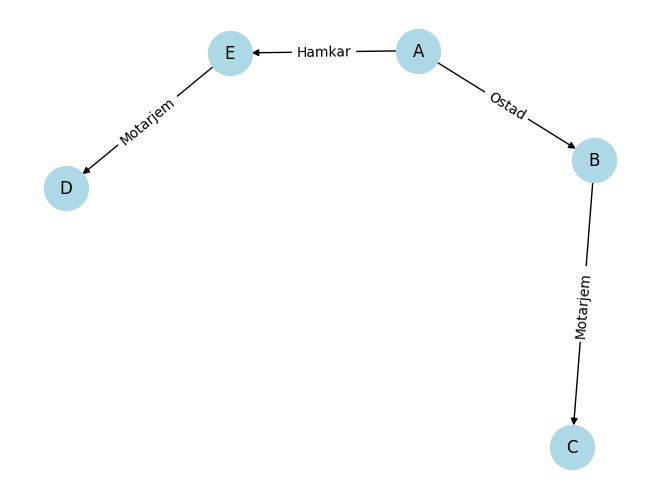

In [39]:
# تنظیم رنگ لبه‌ها بر اساس اینکه پیش‌بینی‌شده هستند یا نه
edge_colors = []
for u, v, d in G.edges(data=True):
    if 'inferred' in d and d['inferred']:
        edge_colors.append('red')
    else:
        edge_colors.append('black')

# تنظیم لیبل لبه‌ها
edge_labels = nx.get_edge_attributes(G, 'relation')

# رسم گراف
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, edge_color=edge_colors)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()
